<a href="https://colab.research.google.com/github/wheemin-2/24-2-ESAA/blob/main/0927_HW_Data_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **데이터 전처리**

## **데이터 인코딩**

### **레이블 인코딩(Label Encoding)**

- LabelEncoder( ) 클래스로 구현함

- 카테고리 feature를 코드형 숫자 값으로 변환하는 것

- e.g. 상품 데이터의 상품 구분이 TV, 냉장고, 선풍기 값으로 되어있는 경우, TV : 1, 냉장고 : 2, 선풍기 : 3 으로 변환하는 것
    - '01', '02'와 같은 코드 값 역시 문자열이므로 숫자형 값으로 변환해야함


In [ ]:
from sklearn.preprocessing import LabelEncoder

items = ['TV','냉장고','전자레인지','컴퓨터','선풍기','선풍기','믹서','믹서']

#LabelEncoder를 객체로 생성한 후, fit()과 transform()으로 레이블 인코딩 수행
encoder = LabelEncoder()
encoder.fit(items)
labels = encoder.transform(items)
print('인코딩 변환값:', labels)

인코딩 변환값: [0 1 4 5 3 3 2 2]


In [ ]:
# 데이터가 많은 경우 어떤 문자열이 어떤 숫자 값으로 인코딩 되었는지는 classes_ 속성값으로 확인하면 됨
print('인코딩 클래스:', encoder.classes_)

인코딩 클래스: ['TV' '냉장고' '믹서' '선풍기' '전자레인지' '컴퓨터']


In [ ]:
# inverse_transform()을 통해 인코딩된 값을 다시 디코딩할 수 있음
print('디코딩 원본값:', encoder.inverse_transform([4,5,2,0,1,1,3,3]))

디코딩 원본값: ['전자레인지' '컴퓨터' '믹서' 'TV' '냉장고' '냉장고' '선풍기' '선풍기']


### **원-핫 인코딩(One-Hot Encoding)**

- 피처 값의 유형에 따라 새로운 피처를 추가해 고유 값에 해당하는 칼럼에만 1을 표시하고 나머지 칼럼에는 0을 표시하는 방식

- OneHotEncoder() 클래스로 변환이 가능

 ![원핫인코딩](https://wikidocs.net/images/page/223697/%EC%8A%A4%ED%81%AC%EB%A6%B0%EC%83%B7_2023-11-30_145714.png)

- 레이블 인코딩의 문제점을 해결하기 위한 인코딩 방식
    - 레이블 인코딩은 ML 알고리즘에 적용할 시 숫자 값의 크고 작음에 대한 특성이 작용함. 가령 냉장고가 1, 믹서가 2로 변환되면, 1보다 2가 더 큰 값이므로 특정 ML 알고리즘에서 가중치가 더 부여되거나 더 중요하게 인식될 가능성이 있음.
    - 레이블 인코딩은 선형 회귀 등의 알고리즘에는 적용하면 안 됨(트리 계열의 ML 알고리즘은 숫자의 이러한 특성을 반영하지 않으므로 상관 없음)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

items = ['TV','냉장고','전자레인지','컴퓨터','선풍기','선풍기','믹서','믹서']

#2차원 ndarray로 변환하는 과정이 필요!
items = np.array(items).reshape(-1,1)

#원-핫 인코딩 적용
oh_encoder = OneHotEncoder()
oh_encoder.fit(items)
oh_labels = oh_encoder.transform(items)

#OneHotEncoder로 변환한 결과는 희소행렬이므로 toarray()를 이용해 밀집 행렬로 변환
print('원-핫 인코딩 데이터')
print(oh_labels.toarray())
print('원-핫 인코딩 데이터 차원')
print(oh_labels.shape)

원-핫 인코딩 데이터
[[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]]
원-핫 인코딩 데이터 차원
(8, 6)


In [ ]:
# 판다스의 get_dummies()를 이용한 원-핫 인코딩
# 문자열 카테고리 값을 숫자 형으로 변환(OneHotEncoder 방법)할 필요 없이 바로 변환 가능

import pandas as pd

df = pd.DataFrame({'item':['TV','냉장고','전자레인지','컴퓨터','선풍기','선풍기','믹서','믹서']})
pd.get_dummies(df)

,item_TV,item_냉장고,item_믹서,item_선풍기,item_전자레인지,item_컴퓨터
0,True,False,False,False,False,False
1,False,True,False,False,False,False
2,False,False,False,False,True,False
3,False,False,False,False,False,True
4,False,False,False,True,False,False
5,False,False,False,True,False,False
6,False,False,True,False,False,False
7,False,False,True,False,False,False


## **피처 스케일링과 정규화**

- 피처 스케일링 : 서로 다른 변수의 값 범위를 일정한 수준으로 맞추는 작업

- 표준화(Standardization)와 정규화(Normalization)이 있음

**표준화**

* 데이터의 피처 각각이 평균이 0, 분산이 1인 가우시안 정규 분포를 가진 값으로 변환하는 것

**정규화**

* 서로 다른 피처의 크기를 통일하기 위해 크기를 변환해주는 것

* e.g. 피처 A : 0~100km / 피처 B : 0 ~ 100,000,000 원 으로 주어진 경우 이 변수를 모두 동일한 크기 단위로 비교하기 위해 값을 모두 최소 0 ~ 최대 1 로 변환하는 것 (개별 데이터의 크기를 모두 똑같은 단위로 변경)

![Feature Scaling](https://miro.medium.com/v2/resize:fit:1120/1*Bx8sWhleKvBdSWECm6eeFg.png)

**사이킷런의 Normalizer 모듈**

* 선형대수에서의 정규화 개념이 적용됨

* 개별 벡터의 크기를 맞추기 위해 변환하는 것

![Normalizer](https://i.sstatic.net/wWpG2.png)


### **StandardScaler**

* 표준화를 쉽게 지원하기 위한 클래스

In [ ]:
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()
iris_data = iris.data
iris_df = pd.DataFrame(data=iris_data, columns=iris.feature_names)

print('feature들의 평균 값')
print(iris_df.mean())
print('\nfeature들의 분산 값')
print(iris_df.var())

feature들의 평균 값
sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64

feature들의 분산 값
sepal length (cm)    0.685694
sepal width (cm)     0.189979
petal length (cm)    3.116278
petal width (cm)     0.581006
dtype: float64


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)  # ndarray로 반환됨

# ndarray -> DataFrame으로 변환
iris_df_scaled = pd.DataFrame(data=iris_scaled, columns=iris.feature_names)
print('feature들의 평균 값')
print(iris_df_scaled.mean())
print('\nfeature들의 분산 값')
print(iris_df_scaled.var())

feature들의 평균 값
sepal length (cm)   -1.690315e-15
sepal width (cm)    -1.842970e-15
petal length (cm)   -1.698641e-15
petal width (cm)    -1.409243e-15
dtype: float64

feature들의 분산 값
sepal length (cm)    1.006711
sepal width (cm)     1.006711
petal length (cm)    1.006711
petal width (cm)     1.006711
dtype: float64


### **MinMaxScaler**

* 데이터 값을 0과 1 사이의 범위 값으로 변환함
    * 음수 값이 있다면 -1 ~ 1 값으로 변환

* 데이터의 분포가 가우시안 분포가 아닐 경우에 Min, Max Scale을 적용해볼 수 있음

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)  # ndarray 반환

# ndarray -> DataFrame 변환
iris_df_scaled = pd.DataFrame(data = iris_scaled, columns = iris.feature_names)
print('feature들의 최솟값')
print(iris_df_scaled.min())
print('\nfeature들의 최댓값')
print(iris_df_scaled.max())

feature들의 최솟값
sepal length (cm)    0.0
sepal width (cm)     0.0
petal length (cm)    0.0
petal width (cm)     0.0
dtype: float64

feature들의 최댓값
sepal length (cm)    1.0
sepal width (cm)     1.0
petal length (cm)    1.0
petal width (cm)     1.0
dtype: float64


모든 피처에 0에서 1 사이의 값으로 변환되는 스케일링이 적용되었음

### **학습 데이터와 테스트 데이터의 스케일링 변환 시 유의점**

* Scaler 객체를 이용해 학습 데이터 세트로 fit()과 transform()을 적용하면 테스트 데이터 세트로는 다시 fit()을 수행하지 않고 학습 데이터 세트로 fit()을 수행한 결과를 이용해 transform() 변환을 적용해야함

* 테스트 데이터에 다시 fit()을 적용하면 train/test dataset의 스케일링 기준 정보가 서로 달라지므로 올바른 예측 결과를 도출하지 못 할 수 있음

* 가능하다면 전체 데이터의 스케일링 변환을 적용한 뒤 학습과 테스트 데이터로 분리하는 게 좋음

    * 여의치 않다면 테스트 데이터 변환 시에는 fit(), fit_transform()을 적용하지 않고 학습 데이터로 이미 fit()된 Scaler 객체를 이용해 transform()으로 변환

In [ ]:
# 테스트 데이터에 fit을 적용하면 발생하는 문제

from sklearn.preprocessing import MinMaxScaler
import numpy as np

# 학습 데이터는 0~10, 테스트 데이터는 0~5 값을 가지는 데이터 셋 생성
# Scaler 클래스의 fit(), transform()은 2차원 이상 데이터만 가능하므로 reshape(-1,1)로 차원 변경
train_array = np.arange(0,11).reshape(-1,1)
test_array = np.arange(0,6).reshape(-1,1)

# 학습 데이터 변환
scaler = MinMaxScaler()
scaler.fit(train_array)
train_scaled = scaler.transform(train_array)

print('원본 train_array 데이터:', np.round(train_array.reshape(-1),2))
print('Scale된 train_array 데이터:', np.round(train_scaled.reshape(-1),2))

원본 train_array 데이터: [ 0  1  2  3  4  5  6  7  8  9 10]
Scale된 train_array 데이터: [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


In [ ]:
# 테스트 데이터 변환 (테스트 데이터에 fit을 다시 한 경우)
scaler.fit(test_array)
test_scaled = scaler.transform(test_array)

print('원본 test_array 데이터:', np.round(test_array.reshape(-1),2))
print('Scale된 test_array 데이터:', np.round(test_scaled.reshape(-1),2))

원본 test_array 데이터: [0 1 2 3 4 5]
Scale된 test_array 데이터: [0.  0.2 0.4 0.6 0.8 1. ]


테스트 데이터에 fit()을 다시 적용한 후 스케일링하면 학습 데이터와 테스트 데이터의 서로 다른 원본 값이 동일한 값으로 변환되게 됨

(0.2로 스케일링 된 값이 학습 데이터에서는 2이지만 테스트 데이터에서는 1임)

In [ ]:
# 스케일링 변환이 잘 된 경우

scaler = MinMaxScaler()
scaler.fit(train_array)
train_scaled = scaler.transform(train_array)
print('원본 train_array 데이터:', np.round(train_array.reshape(-1),2))
print('Scale된 train_array 데이터:', np.round(train_scaled.reshape(-1),2))

test_scaled = scaler.transform(test_array)
print('\n원본 test_array 데이터:', np.round(test_array.reshape(-1),2))
print('Scale된 test_array 데이터:', np.round(test_scaled.reshape(-1),2))

원본 train_array 데이터: [ 0  1  2  3  4  5  6  7  8  9 10]
Scale된 train_array 데이터: [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]

원본 test_array 데이터: [0 1 2 3 4 5]
Scale된 test_array 데이터: [0.  0.1 0.2 0.3 0.4 0.5]


# **사이킷런으로 수행하는 타이타닉 생존자 예측**

타이타닉 탑승자 데이터 변수 설명

* sibsp : 같이 탑승한 형제자매 또는 배우자 인원수
* parch : 같이 탑승한 부모님 또는 어린이 인원수
* cabin : 선실 번호
* embarked : 중간 정착 항구 (C : Cherbourg, Q : Queenstown, S : Southampton)

## **데이터 불러오기**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
titanic_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ESAA/data/titanic_train.csv')
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [3]:
print('\n ### 학습 데이터 정보 ### \n')
print(titanic_df.info())


 ### 학습 데이터 정보 ### 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


## **데이터 전처리**

In [4]:
# Null 값 처리하기

titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace=True)
titanic_df['Cabin'].fillna('N',inplace=True)
titanic_df['Embarked'].fillna('N',inplace=True)
print('데이터 세트 Null값 개수:', titanic_df.isnull().sum().sum())

데이터 세트 Null값 개수: 0


In [5]:
# 문자열 변수 분포 확인

print('Sex 값 분포:\n', titanic_df['Sex'].value_counts())
print('\n Cabin 값 분포:\n', titanic_df['Cabin'].value_counts())
print('\n Embarked 값 분포:\n', titanic_df['Embarked'].value_counts())

Sex 값 분포:
 Sex
male      577
female    314
Name: count, dtype: int64

 Cabin 값 분포:
 Cabin
N              687
C23 C25 C27      4
G6               4
B96 B98          4
C22 C26          3
              ... 
E34              1
C7               1
C54              1
E36              1
C148             1
Name: count, Length: 148, dtype: int64

 Embarked 값 분포:
 Embarked
S    644
C    168
Q     77
N      2
Name: count, dtype: int64


Cabin 변수의 경우 N 이 687 건으로 가장 많고, C23 C25 C27 과 같이 여러 Cabin이 한꺼번에 표시된 값이 여러 건임.

Cabin의 경우 가장 앞에 나오는 알파벳이 선실 등급을 나타내고, 이는 생존 여부를 예측하는 데에 중요한 변수가 될 것이므로 앞 문자만 추출할 필요가 있음

In [6]:
titanic_df['Cabin'] = titanic_df['Cabin'].str[:1]
print(titanic_df['Cabin'].head(3))

0    N
1    C
2    N
Name: Cabin, dtype: object


## **성별에 따른 생존자 수 비교**

In [7]:
titanic_df.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

<Axes: xlabel='Sex', ylabel='Survived'>

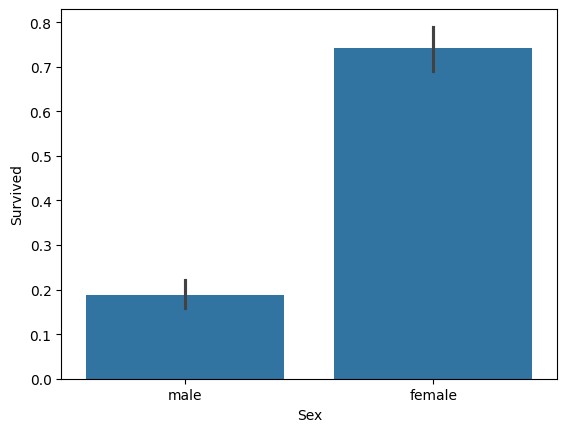

In [8]:
sns.barplot(x='Sex',y='Survived',data=titanic_df)

## **객실 등급 별 성별에 따른 생존자 수 비교**

<Axes: xlabel='Pclass', ylabel='Survived'>

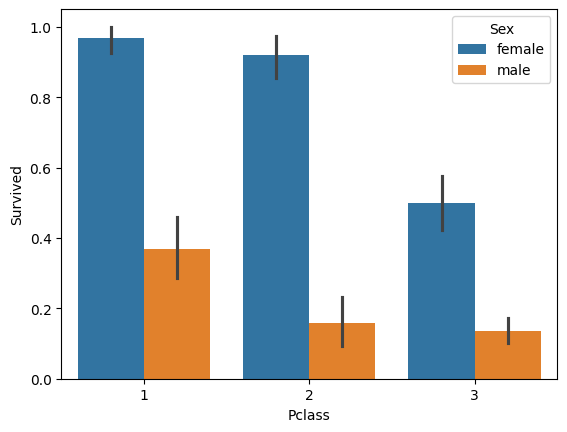

In [9]:
sns.barplot(x='Pclass',y='Survived',hue='Sex',data=titanic_df)

## **나이에 따른 생존 확률 비교**

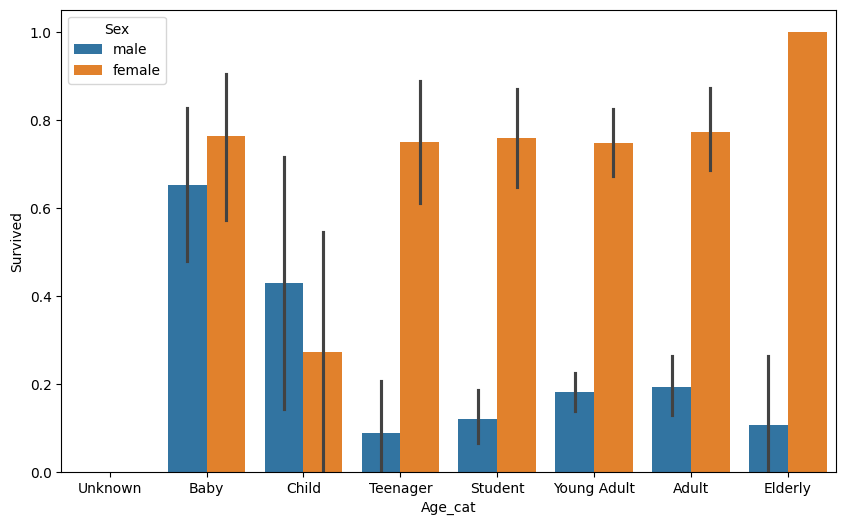

In [10]:
# 입력 age에 따라 구분 값을 반환하는 함수 설정
def get_category(age):
    cat = ''
    if age <= -1 : cat = 'Unkown'
    elif age <=5 : cat = 'Baby'
    elif age <=12 : cat = 'Child'
    elif age <= 18 : cat = 'Teenager'
    elif age <= 25 : cat = 'Student'
    elif age <= 35 : cat = 'Young Adult'
    elif age <= 60 : cat = 'Adult'
    else : cat = 'Elderly'

    return cat

plt.figure(figsize=(10,6))

# X축의 값을 순차적으로 표시하기 위한 설정
group_names = ['Unknown','Baby','Child','Teenager','Student','Young Adult','Adult','Elderly']

titanic_df['Age_cat'] = titanic_df['Age'].apply(lambda x : get_category(x))
sns.barplot(x='Age_cat', y='Survived',hue='Sex', data=titanic_df, order=group_names)
titanic_df.drop('Age_cat',axis=1, inplace=True)

## **문자형 카테코리 피처 -> 숫자형 카테고리 피처 변환**

In [11]:
from sklearn.preprocessing import LabelEncoder

# titanic_df 내의 여러 칼럼을 한 번에 숫자형으로 변환할 encode_features() 함수 생성
def encode_features(dataDF):
    features = ['Cabin','Sex','Embarked']
    for feature in features :
        le = LabelEncoder()
        le = le.fit(dataDF[feature])
        dataDF[feature] = le.transform(dataDF[feature])

    return dataDF

titanic_df = encode_features(titanic_df)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,7,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,7,3


Sex, Cabin, Embarked가 숫자형으로 변환됨

## **데이터 전처리 전체 정리 코드**

In [15]:
# Null 처리 함수
def fillna(df):
    df['Age'].fillna(df['Age'].mean(), inplace=True)
    df['Cabin'].fillna('N', inplace=True)
    df['Embarked'].fillna('N',inplace=True)
    df['Fare'].fillna(0, inplace=True)
    return df

# 머신러닝 알고리즘에 불필요한 피처 제거
def drop_features(df):
    df.drop(['PassengerId','Name','Ticket'], axis=1, inplace=True)
    return df

# 레이블 인코딩 수행
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin','Sex','Embarked']
    for feature in features :
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

# 앞에서 설정한 데이터 전처리 함수 호출
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

## **결정트리, 랜덤 포레스트, 로지스틱 회귀를 이용한 타이타닉 생존자 예측**

In [16]:
# 원본 데이터를 재로딩하고, 피처 데이터 세트와 레이블 데이터 세트 추출
titanic_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ESAA/data/titanic_train.csv')
y_titanic_df = titanic_df['Survived']     # label : Survived 여부
X_titanic_df = titanic_df.drop('Survived',axis=1)  # feature : Survived를 제외한 변수들(PassengerId, Name, Ticket도 제외)

X_titanic_df = transform_features(X_titanic_df)

In [18]:
# train/test data split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, test_size=0.2, random_state=11)

In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 결정트리, Random Forest, 로지스틱 회귀 Classifier 클래스 생성
dt_clf = DecisionTreeClassifier(random_state=11)
rf_clf = RandomForestClassifier(random_state=11)
lr_clf = LogisticRegression(solver='liblinear')

# DecisionTreeClassifier 학습/예측/평가
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)
print('DecisionTreeClassifier 정확도: {0:.4f}'.format(accuracy_score(y_test, dt_pred)))

# RandomForestClassifier 학습/예측/평가
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
print('RandomForestClassifier 정확도: {0:.4f}'.format(accuracy_score(y_test, rf_pred)))

#LogisticRegression 학습/예측/평가
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
print('LogisticRegression 정확도: {0:.4f}'.format(accuracy_score(y_test, lr_pred)))

DecisionTreeClassifier 정확도: 0.7877
RandomForestClassifier 정확도: 0.8547
LogisticRegression 정확도: 0.8659


LogisticRegression이 가장 높은 정확도를 나타냄

아직 최적화 작업을 수행하지 않았고, 데이터 양도 충분하지 않기 때문에 어떤 알고리즘이 가장 성능이 좋다고 평가할 수는 없음

## **교차 검증으로 Classifier 모델 평가**

### **K-Fold 교차 검증**

폴드 수는 5개로 설정

In [29]:
from sklearn.model_selection import KFold

def exec_kfold(clf, folds=5):
    # 폴드 세트가 5개인 KFold 객체를 생성
    kfold = KFold(n_splits=folds)
    # 폴드 수만큼 예측 결과를 저장하기 위한 리스트 객체 생성
    scores = []

    # KFold 교차 검증 수행
    for iter_count, (train_index, test_index) in enumerate(kfold.split(X_titanic_df)):
        X_train, X_test = X_titanic_df.values[train_index], X_titanic_df.values[test_index]
        y_train, y_test = y_titanic_df.values[train_index], y_titanic_df.values[test_index]

        # Classifier 학습/예측/정확도 계산
        clf.fit(X_train, y_train)
        pred = clf.predict(X_test)
        accuracy = accuracy_score(pred, y_test)
        scores.append(accuracy)
        print('교차 검증 {0} 정확도 : {1:.4f}'.format(iter_count, accuracy))


    # 5개의 fold에서의 평균 정확도 계산
    mean_score = np.mean(scores)
    print("평균 정확도 :{0:.4f}".format(mean_score))

# exec_kfold 호출
exec_kfold(dt_clf, folds=5)

교차 검증 0 정확도 : 0.7542
교차 검증 1 정확도 : 0.7809
교차 검증 2 정확도 : 0.7865
교차 검증 3 정확도 : 0.7697
교차 검증 4 정확도 : 0.8202
평균 정확도 :0.7823


### **cross_val_score() API를 이용한 교차검증**

Stratified KFold 교차검증을 사용

In [30]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(dt_clf, X_titanic_df, y_titanic_df, cv=5)

for iter_count, accuracy in enumerate(scores):
    print('교차 검증 {0} 정확도: {1:.4f}'.format(iter_count, accuracy))

print('평균 정확도: {0:.4f}'.format(np.mean(scores)))

교차 검증 0 정확도: 0.7430
교차 검증 1 정확도: 0.7753
교차 검증 2 정확도: 0.7921
교차 검증 3 정확도: 0.7865
교차 검증 4 정확도: 0.8427
평균 정확도: 0.7879


### **GridSearchCV**

DecisionTreeClassifier의 최적 하이퍼 파라미터를 찾고 예측 성능 측정

In [32]:
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth':[2,3,5,10],
              'min_samples_split':[2,3,5], 'min_samples_leaf':[1,5,8]}

grid_dclf = GridSearchCV(dt_clf, param_grid=parameters, scoring='accuracy', cv=5)
grid_dclf.fit(X_train, y_train)

print('GridSearchCV 최적 하이퍼 파라미터:', grid_dclf.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_dclf.best_score_))
best_dclf = grid_dclf.best_estimator_

# GridSearchCV의 최적 하이퍼 파라미터로 학습된 Estimator로 예측 및 평가 수행
dpredictions = best_dclf.predict(X_test)
accuracy = accuracy_score(y_test, dpredictions)
print('테스트 세트에서의 DecisionTreeClassifier 정확도 : {0:.4f}'.format(accuracy))

GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}
GridSearchCV 최고 정확도: 0.7992
테스트 세트에서의 DecisionTreeClassifier 정확도 : 0.8715
